In this tutorial we examine the effect of changing the target(s) on the results a horsetail matching optimization. 
We'll use TP3 from the demo problems. We also define a function for easy plotting using matplotlib.

In [1]:
from horsetailmatching import HorsetailMatching, GaussianParameter
from horsetailmatching.demoproblems import TP3

from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

def plotHorsetail(theHM, c='b', label=''):
    (x, y), _, _ = theHM.getHorsetail()
    plt.plot(x, y, c=c, label=label)
    plt.plot([theHM.ftarget(yi) for yi in y], y, c=c, linestyle='dashed')
    plt.xlim([-10, 10])

In the following code we setup a horsetail matching optimization using test problem 3, and then run optimizations under three targets: a standard target, a risk averse target, and a very risk averse target. 

  status: 1
    nfev: 21
   maxcv: 0.0
 success: True
     fun: 3.3713526571048629
       x: array(0.5210984375)
 message: 'Optimization terminated successfully.'
  status: 1
    nfev: 21
   maxcv: 0.0
 success: True
     fun: 4.7386329246448557
       x: array(0.846137890625)
 message: 'Optimization terminated successfully.'
  status: 1
    nfev: 24
   maxcv: 0.0
 success: True
     fun: 4.5306494490253062
       x: array(0.92393046875)
 message: 'Optimization terminated successfully.'


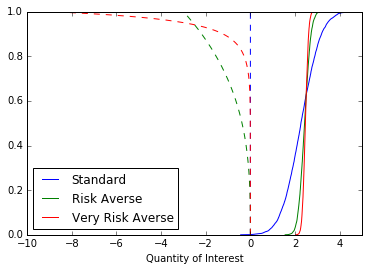

In [2]:
u1 = GaussianParameter()

def standardTarget(h):
    return 0.

theHM = HorsetailMatching(TP3, u1, ftarget=standardTarget, samples_prob=5000)
solution1 = minimize(theHM.evalMetric, x0=0.6, method='COBYLA',
        constraints=[{'type': 'ineq', 'fun': lambda x: x}, {'type': 'ineq', 'fun': lambda x: 1-x}])
theHM.evalMetric(solution1.x)
print(solution1)
plotHorsetail(theHM, c='b', label='Standard')

def riskAverseTarget(h):
    return 0. - 3.*h**3.

theHM.ftarget=riskAverseTarget
solution2 = minimize(theHM.evalMetric, x0=0.6, method='COBYLA',
        constraints=[{'type': 'ineq', 'fun': lambda x: x}, {'type': 'ineq', 'fun': lambda x: 1-x}])
theHM.evalMetric(solution2.x)
print(solution2)
plotHorsetail(theHM, c='g', label='Risk Averse')

def veryRiskAverseTarget(h):
    return 1. - 10.**h**10.

theHM.ftarget=veryRiskAverseTarget
solution3 = minimize(theHM.evalMetric, x0=0.6, method='COBYLA',
        constraints=[{'type': 'ineq', 'fun': lambda x: x}, {'type': 'ineq', 'fun': lambda x: 1-x}])
theHM.evalMetric(solution3.x)
print(solution3)
plotHorsetail(theHM, c='r', label='Very Risk Averse')

plt.xlim([-10, 5])
plt.ylim([0, 1])
plt.xlabel('Quantity of Interest')
plt.legend(loc='lower left')
plt.plot()
plt.show()

You can see that changing the target has changed how much influence is put on different parts of the CDF in the optimization. The more risk averse the target the more the optimizer will try to minimize the highest values of q over the CDF.

 In the next tutorial we'll illustrate how you can use surrogates within horsetail matching so that if evaluating the quantity of interest is expensive, we can use fewer evaluations: http://nbviewer.jupyter.org/github/lwcook/horsetail-matching/blob/master/notebooks/Surrogates.ipynb
 
 For other tutorials, please visit http://www-edc.eng.cam.ac.uk/aerotools/horsetailmatching/